https://www.cl.cam.ac.uk/research/dtg/attarchive/facesataglance.html

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import time
import logging
from sklearn.datasets import fetch_olivetti_faces

logging.basicConfig(level=logging.INFO, format='%(asctime)s %(message)s')

data_home = './datasets/'
logging.info('Start to load dataset')
faces = fetch_olivetti_faces(data_home=data_home)
logging.info('Done with load dataset')

2017-11-23 22:31:08,002 Start to load dataset
2017-11-23 22:31:08,040 Done with load dataset


In [3]:
X = faces.data
y = faces.target
targets = np.unique(faces.target)
target_names = np.array(["c%d" % t for t in targets])
n_targets = target_names.shape[0]
n_samples, h, w = faces.images.shape
print('Sample count: {}\nTarget count: {}'.format(n_samples, n_targets))
print('Image size: {}x{}\nDataset shape: {}\n'.format(w, h, X.shape))

Sample count: 400
Target count: 40
Image size: 64x64
Dataset shape: (400, 4096)



In [4]:
def plot_gallery(images, titles, h, w, n_row=2, n_col=5):
    """显示图片阵列"""
    plt.figure(figsize=(2 * n_col, 2.2 * n_row), dpi=144)
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.01)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i])
        plt.axis('off')

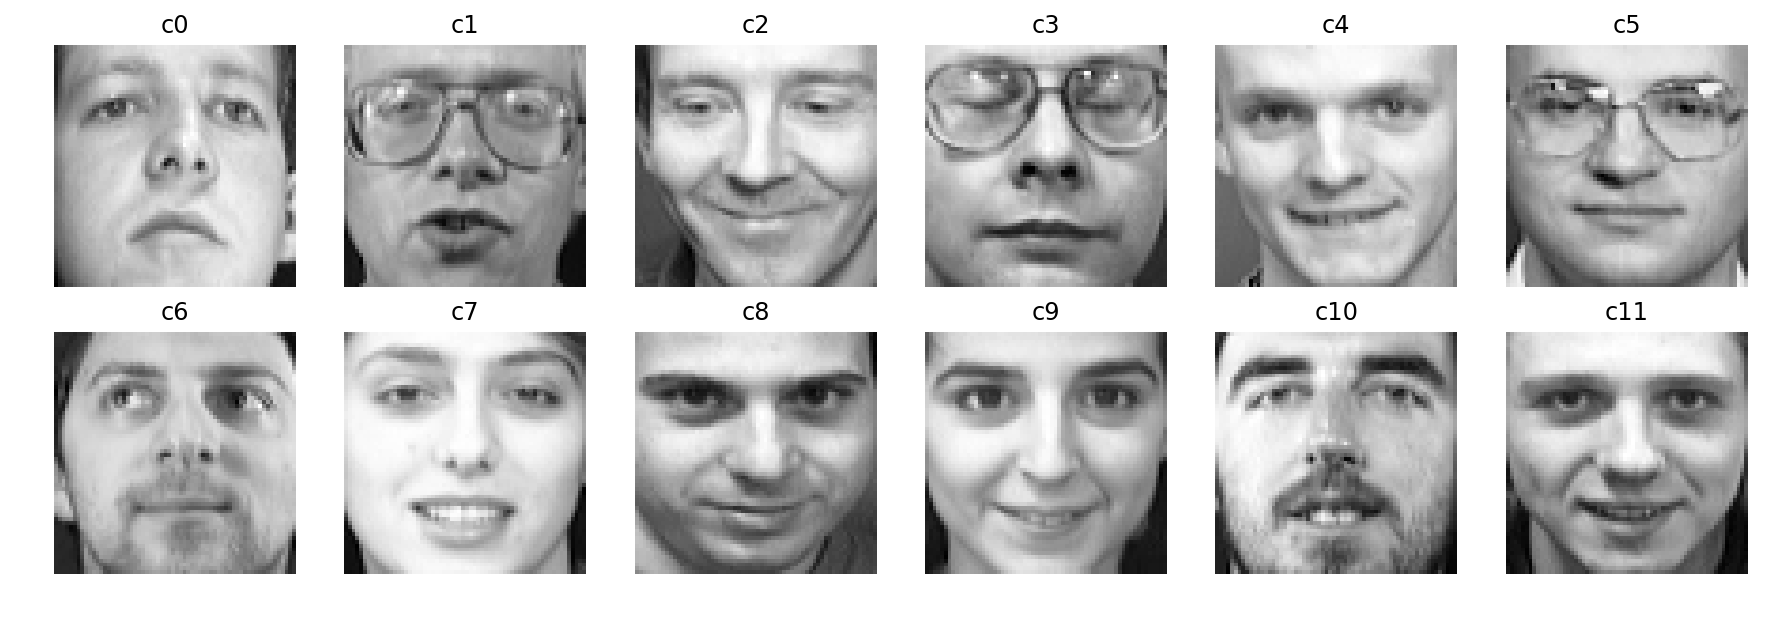

In [5]:
n_row = 2
n_col = 6

sample_images = None
sample_titles = []
for i in range(n_targets):
    people_images = X[y == i]
    people_sample_index = np.random.randint(0, people_images.shape[0], 1)
    people_sample_image = people_images[people_sample_index, :]
    if sample_images is not None:
        sample_images = np.concatenate(
            (sample_images, people_sample_image), axis=0)
    else:
        sample_images = people_sample_image
    sample_titles.append(target_names[i])

plot_gallery(sample_images, sample_titles, h, w, n_row, n_col)

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=4)

In [7]:
from sklearn.svm import SVC

start = time.clock()
print('Fitting train datasets ...')
clf = SVC(class_weight='balanced')
clf.fit(X_train, y_train)
print('Done in {0:.2f}s'.format(time.clock() - start))

Fitting train datasets ...
Done in 1.07s


In [8]:
start = time.clock()
print("Predicting test dataset ...")
y_pred = clf.predict(X_test)
print('Done in {0:.2f}s'.format(time.clock() - start))

Predicting test dataset ...
Done in 0.14s


In [9]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred, labels=range(n_targets))
print("confusion matrix:\n")
np.set_printoptions(threshold=np.nan)
print(cm)

confusion matrix:

[[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0
  0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
  0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
  0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [10]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=target_names))

             precision    recall  f1-score   support

         c0       0.00      0.00      0.00         1
         c1       0.00      0.00      0.00         3
         c2       0.00      0.00      0.00         2
         c3       0.00      0.00      0.00         1
         c4       0.00      0.00      0.00         1
         c5       0.00      0.00      0.00         1
         c6       0.00      0.00      0.00         4
         c7       0.00      0.00      0.00         2
         c8       0.00      0.00      0.00         4
         c9       0.00      0.00      0.00         2
        c10       0.00      0.00      0.00         1
        c11       0.00      0.00      0.00         0
        c12       0.00      0.00      0.00         4
        c13       0.00      0.00      0.00         4
        c14       0.00      0.00      0.00         1
        c15       0.00      0.00      0.00         1
        c16       0.00      0.00      0.00         3
        c17       0.00      0.00      0.00   

/Users/kamidox/work/books/ml-scikit-learn/code/.venv/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/kamidox/work/books/ml-scikit-learn/code/.venv/lib/python2.7/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [11]:
from sklearn.decomposition import PCA

print("Exploring explained variance ratio for dataset ...")
candidate_components = range(10, 300, 30)
explained_ratios = []
start = time.clock()
for c in candidate_components:
    pca = PCA(n_components=c)
    X_pca = pca.fit_transform(X)
    explained_ratios.append(np.sum(pca.explained_variance_ratio_))
print('Done in {0:.2f}s'.format(time.clock() - start))

Exploring explained variance ratio for dataset ...
Done in 8.22s


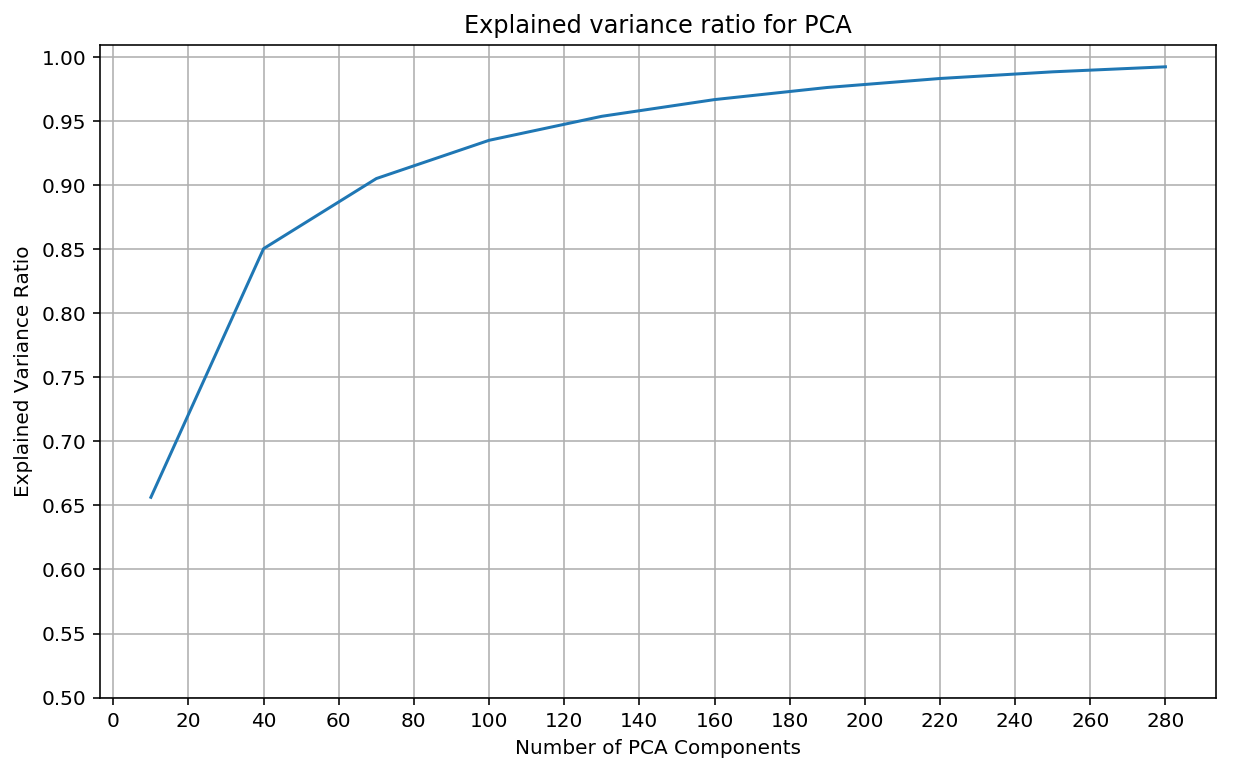

In [12]:
plt.figure(figsize=(10, 6), dpi=144)
plt.grid()
plt.plot(candidate_components, explained_ratios)
plt.xlabel('Number of PCA Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained variance ratio for PCA')
plt.yticks(np.arange(0.5, 1.05, .05))
plt.xticks(np.arange(0, 300, 20))

In [13]:
def title_prefix(prefix, title):
    return "{}: {}".format(prefix, title)

Fitting and projecting on PCA(n_components=140) ...
Done in 0.84s
Fitting and projecting on PCA(n_components=75) ...
Done in 0.56s
Fitting and projecting on PCA(n_components=37) ...
Done in 0.44s
Fitting and projecting on PCA(n_components=19) ...
Done in 0.36s
Fitting and projecting on PCA(n_components=8) ...
Done in 0.22s
Plotting sample image with different number of PCA conpoments ...


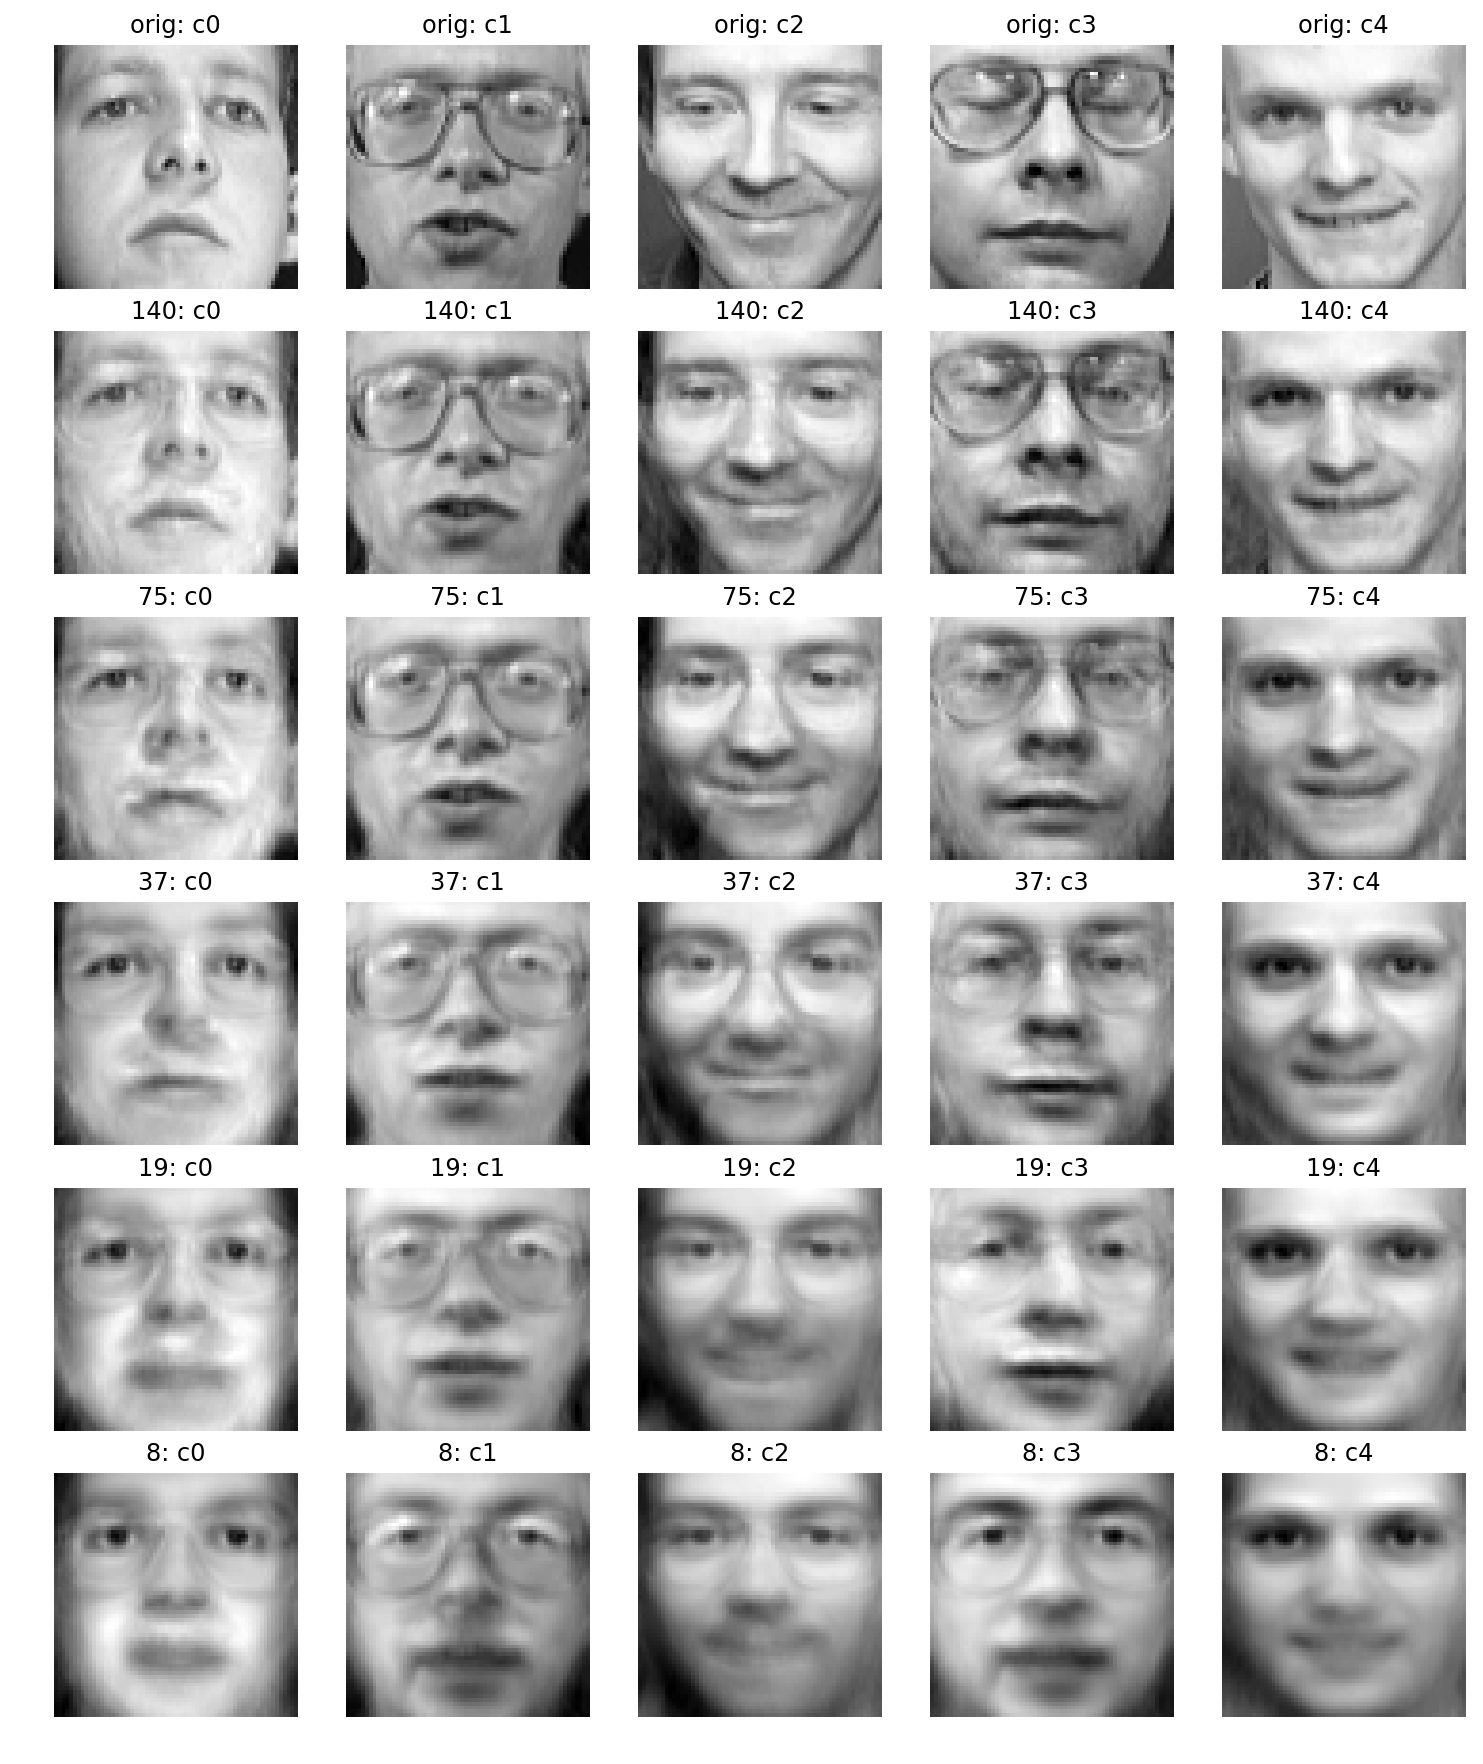

In [14]:
n_row = 1
n_col = 5

sample_images = sample_images[0:5]
sample_titles = sample_titles[0:5]

plotting_images = sample_images
plotting_titles = [title_prefix('orig', t) for t in sample_titles]
candidate_components = [140, 75, 37, 19, 8]
for c in candidate_components:
    print("Fitting and projecting on PCA(n_components={}) ...".format(c))
    start = time.clock()
    pca = PCA(n_components=c)
    pca.fit(X)
    X_sample_pca = pca.transform(sample_images)
    X_sample_inv = pca.inverse_transform(X_sample_pca)
    plotting_images = np.concatenate((plotting_images, X_sample_inv), axis=0)
    sample_title_pca = [title_prefix('{}'.format(c), t) for t in sample_titles]
    plotting_titles = np.concatenate(
        (plotting_titles, sample_title_pca), axis=0)
    print("Done in {0:.2f}s".format(time.clock() - start))

print("Plotting sample image with different number of PCA conpoments ...")
plot_gallery(plotting_images, plotting_titles, h, w,
             n_row * (len(candidate_components) + 1), n_col)

In [15]:
n_components = 140

print("Fitting PCA by using training data ...")
start = time.clock()
pca = PCA(
    n_components=n_components, svd_solver='randomized',
    whiten=True).fit(X_train)
print("Done in {0:.2f}s".format(time.clock() - start))

print("Projecting input data for PCA ...")
start = time.clock()
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("Done in {0:.2f}s".format(time.clock() - start))

Fitting PCA by using training data ...
Done in 0.68s
Projecting input data for PCA ...
Done in 0.04s


In [16]:
from sklearn.model_selection import GridSearchCV

print("Searching the best parameters for SVC ...")
param_grid = {
    'C': [1, 5, 10, 50, 100],
    'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01]
}
clf = GridSearchCV(
    SVC(kernel='rbf', class_weight='balanced'),
    param_grid,
    verbose=2,
    n_jobs=4)
clf = clf.fit(X_train_pca, y_train)
print("Best parameters found by grid search:")
print(clf.best_params_)

Searching the best parameters for SVC ...
Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=1, gamma=0.0001 ...............................................
[CV] C=1, gamma=0.0001 ...............................................
[CV] C=1, gamma=0.0001 ...............................................
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................................ C=1, gamma=0.0001, total=   0.1s
[CV] ................................ C=1, gamma=0.0001, total=   0.1s
[CV] C=1, gamma=0.0005 ...............................................
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................................ C=1, gamma=0.0001, total=   0.1s
[CV] C=1, gamma=0.001 ................................................
[CV] ................................ C=1, gamma=0.0005, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] ................................ C=1, ga

[Parallel(n_jobs=4)]: Done  68 out of  75 | elapsed:    1.8s remaining:    0.2s
[Parallel(n_jobs=4)]: Done  75 out of  75 | elapsed:    1.9s finished


Best parameters found by grid search:
{'C': 10, 'gamma': 0.001}


In [17]:
start = time.clock()
print("Predict test dataset ...")
y_pred = clf.best_estimator_.predict(X_test_pca)
cm = confusion_matrix(y_test, y_pred, labels=range(n_targets))
print("Done in {0:.2f}.\n".format(time.clock() - start))
print("confusion matrix:")
np.set_printoptions(threshold=np.nan)
print(cm)

Predict test dataset ...
Done in 0.01.

confusion matrix:
[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0]
 [1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
  0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0]
 [0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0]
 [0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0]
 [0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0]
 [0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0]
 [0 0 0

In [18]:
print(classification_report(y_test, y_pred, target_names=target_names))

             precision    recall  f1-score   support

         c0       0.50      1.00      0.67         1
         c1       1.00      0.67      0.80         3
         c2       1.00      0.50      0.67         2
         c3       1.00      1.00      1.00         1
         c4       1.00      1.00      1.00         1
         c5       1.00      1.00      1.00         1
         c6       1.00      0.75      0.86         4
         c7       1.00      1.00      1.00         2
         c8       1.00      1.00      1.00         4
         c9       1.00      1.00      1.00         2
        c10       1.00      1.00      1.00         1
        c11       1.00      1.00      1.00         4
        c12       1.00      1.00      1.00         4
        c13       1.00      1.00      1.00         1
        c14       1.00      1.00      1.00         1
        c15       0.75      1.00      0.86         3
        c16       1.00      1.00      1.00         2
        c17       1.00      1.00      1.00   